In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [194]:
def simulate_beta(x_vals,n_samps,n_samps_control,beta_true):
    n_x = len(x_vals)
    means = beta_true*x_vals
    samples = np.random.normal(size = (n_samps,n_x))+means

    control = np.random.normal(size = n_samps_control)

    estimates = np.mean(samples,axis=0) - np.mean(control)

    cov = np.diag(np.ones(n_x) * 1/n_samps)
    corr_part = np.ones(n_x)/n_samps_control
    cov = cov + np.outer(corr_part,corr_part)
    beta = (x_vals.T@np.linalg.inv(cov)@estimates)/(x_vals.T@np.linalg.inv(cov)@x_vals)
    beta_bad = (x_vals.T@estimates)/(x_vals.T@x_vals)
    return beta,beta_bad

In [207]:
x_vals = np.array([1.,2,3])
n_samps_control = 2
n_samps = 20
beta_true = 1

results = np.array([simulate_beta(x_vals,n_samps=n_samps,n_samps_control=n_samps_control,beta_true=beta_true) for i in range(5000)])

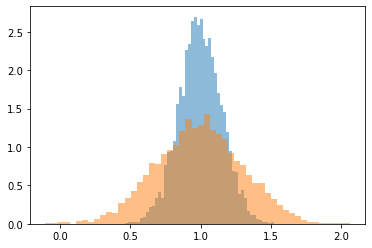

[0.02303572 0.09310279]
[0.99737229 0.99046044]


In [215]:
plt.hist(results[:,0],50,alpha = 0.5,density=True)
plt.hist(results[:,1],50,alpha = 0.5,density=True)
plt.show()
print(np.var(results,axis=0))
print(np.mean(results,axis=0))

In [293]:
seed_val = 0

-4.442750104851635


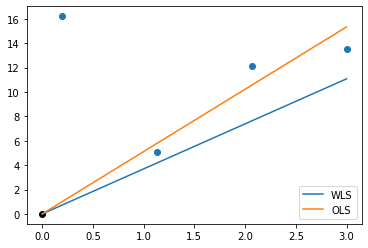

In [299]:
x_vals = np.linspace(0.2,3,4)
n_samps_control = 4
n_samps = 5
beta_true = 1
np.random.seed(0)
n_x = len(x_vals)
means = beta_true*x_vals
sigma = 10

samples = sigma*np.random.normal(size = (n_samps,n_x))+means
control = sigma*np.random.normal(size = n_samps_control)

estimates = np.mean(samples,axis=0) - np.mean(control)

cov = np.diag(np.ones(n_x) * 1/n_samps)
corr_part = np.ones(n_x)/n_samps_control
cov = cov + np.outer(corr_part,corr_part)
beta = (x_vals.T@np.linalg.inv(cov)@estimates)/(x_vals.T@np.linalg.inv(cov)@x_vals)
beta_bad = (x_vals.T@estimates)/(x_vals.T@x_vals)
plt.scatter(x_vals,estimates)
x_vals = np.hstack([0,x_vals])

plt.plot(x_vals,beta*x_vals,label = 'WLS')
plt.plot(x_vals,beta_bad*x_vals,label = "OLS")
plt.scatter(0,0,c = 'black')
plt.legend()
print(np.mean(np.mean(control)))

In [297]:
beta

3.6921083164119652

In [298]:
beta_bad

5.112016410942742